# Assignment Three
## Task D

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models 

import matplotlib.pyplot as plt

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.FashionMNIST('./data/', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST('./data/', train=False, download=True, transform=transform)

In [4]:
class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

In [5]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)

In [6]:
for images, labels in train_loader:
    break

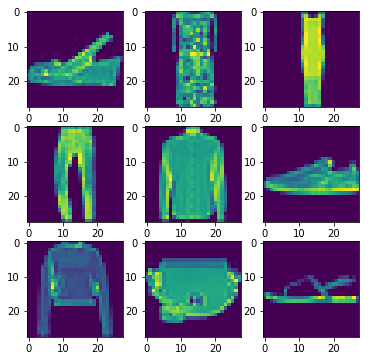

In [7]:
fig = plt.figure(figsize=(6,6))

for i in range(1, 10):
    fig.add_subplot(3, 3, i)
    plt.imshow(images[i].reshape(28, 28))
plt.show()

In [8]:
class CNNmodel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

In [9]:
model = CNNmodel()

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
import time
start_time = time.time()

epochs = 5

train_correct = []
train_loss = []

for i in range(epochs):
    
    trn_corr = 0
    
    for b, (x_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%1000==0:
            print(f'Epoch: {i} Batch: {b} Loss: {loss} Accuracy: {trn_corr.item()*100/(b*10):7.3f}')
        

    train_correct.append(trn_corr)
    train_loss.append(loss)
    
        
full_time = time.time() - start_time
print(f'Training took {full_time/60} minutes')

Epoch: 0 Batch: 1000 Loss: 0.5262666940689087 Accuracy:  66.970
Epoch: 0 Batch: 2000 Loss: 0.6357583403587341 Accuracy:  72.780
Epoch: 0 Batch: 3000 Loss: 0.8308771252632141 Accuracy:  75.353
Epoch: 0 Batch: 4000 Loss: 0.2287256270647049 Accuracy:  77.312
Epoch: 0 Batch: 5000 Loss: 0.20871403813362122 Accuracy:  78.760
Epoch: 0 Batch: 6000 Loss: 0.14697490632534027 Accuracy:  79.813
Epoch: 1 Batch: 1000 Loss: 0.3286169171333313 Accuracy:  86.200
Epoch: 1 Batch: 2000 Loss: 0.7393827438354492 Accuracy:  86.115
Epoch: 1 Batch: 3000 Loss: 0.07348725944757462 Accuracy:  86.387
Epoch: 1 Batch: 4000 Loss: 0.16880714893341064 Accuracy:  86.688
Epoch: 1 Batch: 5000 Loss: 0.7110661268234253 Accuracy:  86.820
Epoch: 1 Batch: 6000 Loss: 0.21548327803611755 Accuracy:  86.883
Epoch: 2 Batch: 1000 Loss: 0.21321530640125275 Accuracy:  88.130
Epoch: 2 Batch: 2000 Loss: 0.24484935402870178 Accuracy:  88.140
Epoch: 2 Batch: 3000 Loss: 0.22900159657001495 Accuracy:  88.303
Epoch: 2 Batch: 4000 Loss: 0.040

In [12]:
model.eval()

with torch.no_grad():
    
    correct = 0
    
    for x_test, y_test in test_loader:
        
        y_val = model(x_test)
        predicted = torch.max(y_val.data, 1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()*100/len(test_data)}')

Test accuracy: 89.26
